## Import Libraries

In [505]:
# To ignore warnings
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

%matplotlib inline


## Load the Data

In [506]:
df = pd.read_csv("cleaned.csv")

In [507]:
df.shape

(5745, 19)

In [508]:
df.head(2)

,Unnamed: 0,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,1,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000
1,8,Manchester United,Defender Centre-Back,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000


## Preprocess the Data

#### 1. Simple EDA + Data Quality checking

In [509]:
# # Accurecy types
# df.dtypes
# df.drop('name', inplace=True, axis=1)

In [510]:
# Accurecy - Outlier

# Convert categorical variables using OneHotEncoding
numeric_features = ['height', 'age', 'appearance', 'goals',
       'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value']
categorical_features = ['team']

In [511]:
for i in categorical_features:
    print(df[i].value_counts())

team
FC Volendam                         30
1.FC Köln                           28
Orlando Pirates                     27
Kasimpasa                           27
FC Utrecht                          26
                                    ..
América Futebol Clube (MG)           2
Grêmio Foot-Ball Porto Alegrense     2
Coritiba Foot Ball Club              2
CA Huracán                           1
Goiás Esporte Clube                  1
Name: count, Length: 373, dtype: int64


In [512]:
df.shape

(5745, 19)

In [513]:
# Calculate the frequency of each 'Type'
type_counts = df['team'].value_counts()

# Filter 'Type' values that appear 10 or more times
df = df[df['team'].isin(type_counts[type_counts >= 2].index)]

In [514]:
df.head(2)

,Unnamed: 0,team,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
0,1,Manchester United,Goalkeeper,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,1500000,22000000
1,8,Manchester United,Defender Centre-Back,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,2758,47,13,0,2000000,2000000


In [515]:
df.shape

(5743, 19)

In [516]:
df.shape

(5743, 19)

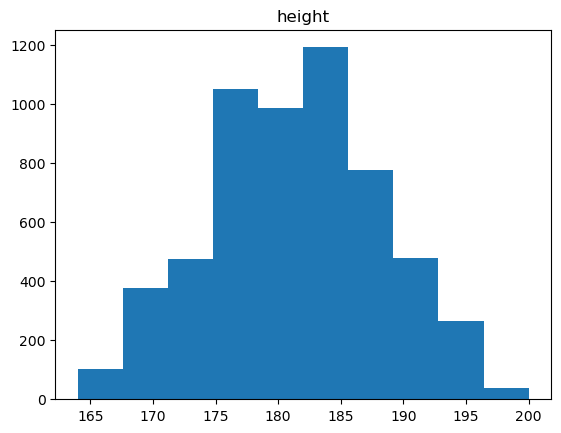

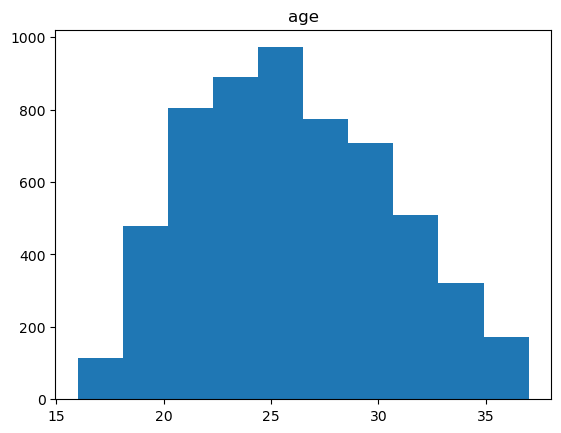

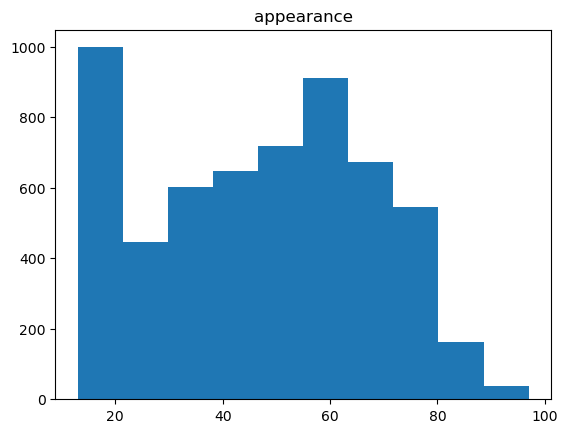

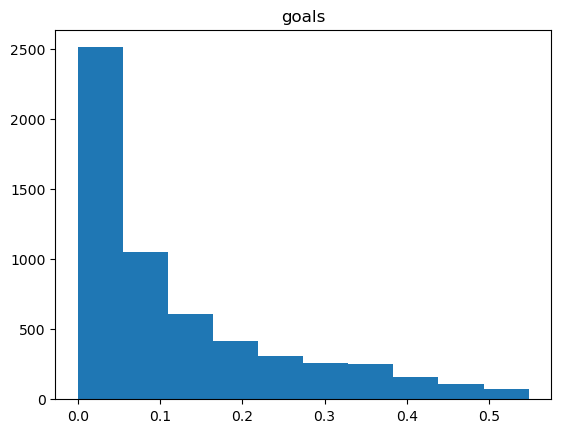

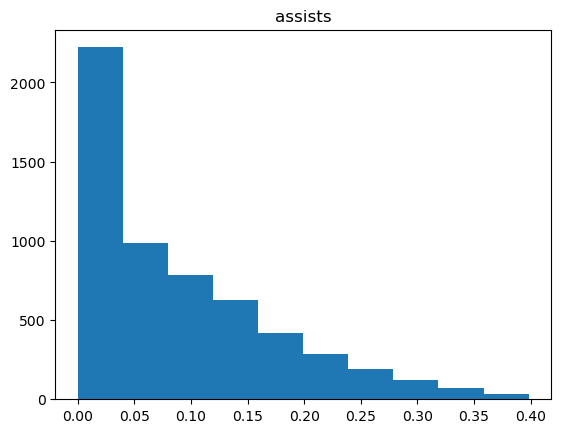

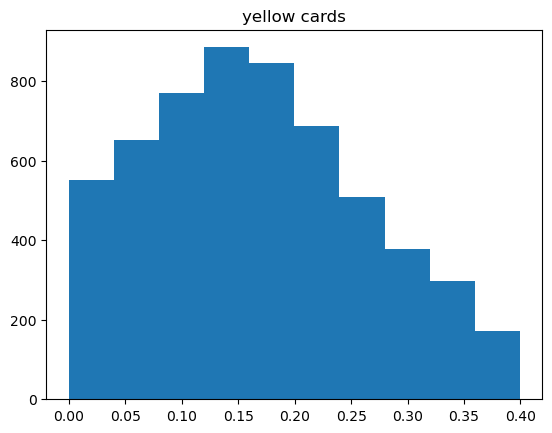

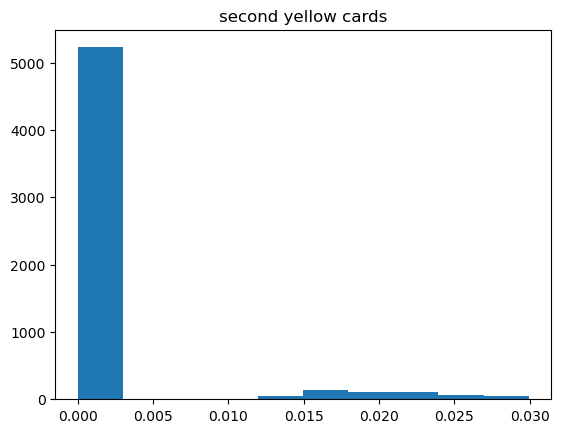

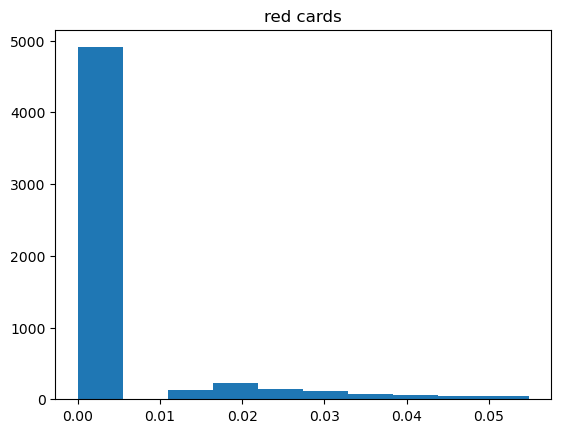

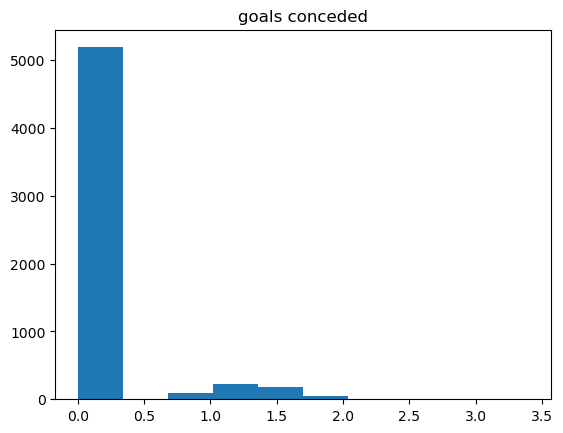

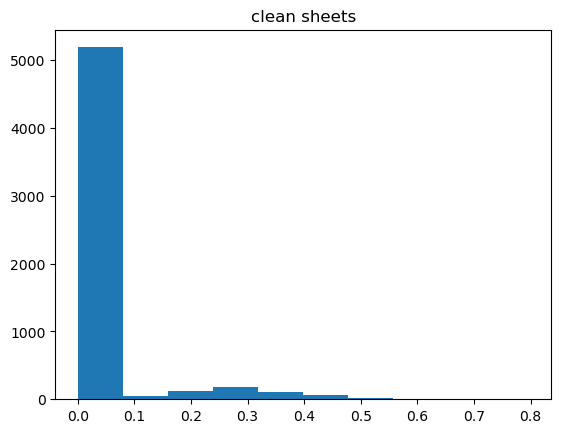

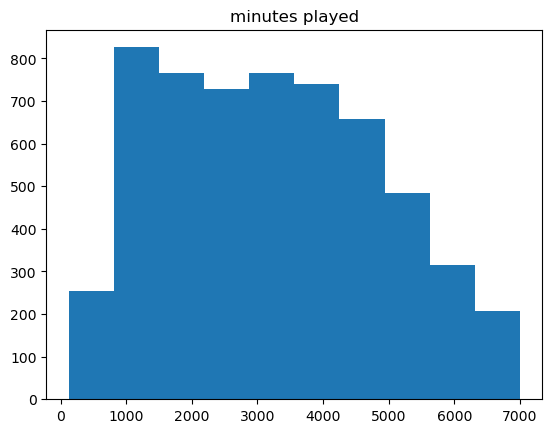

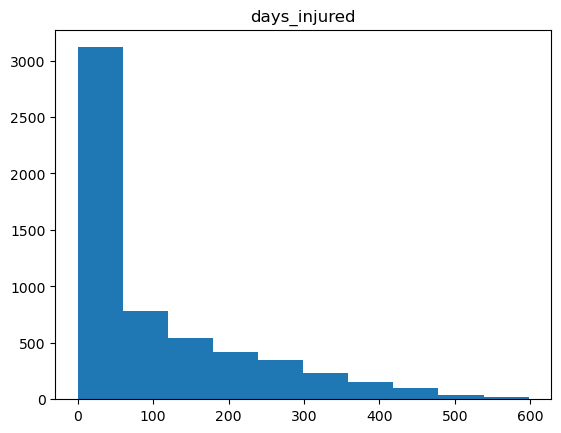

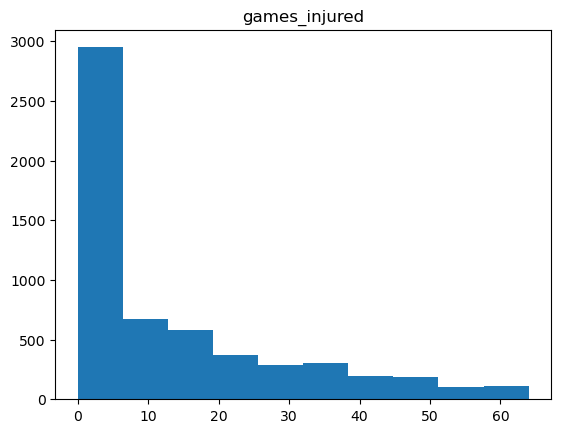

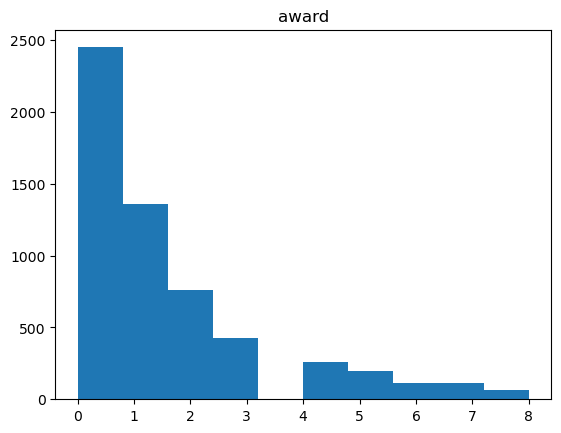

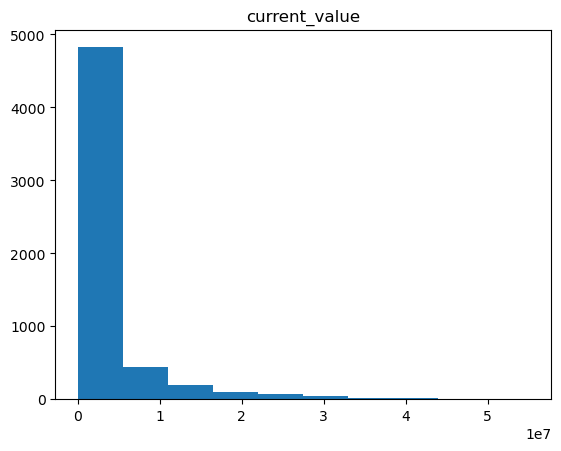

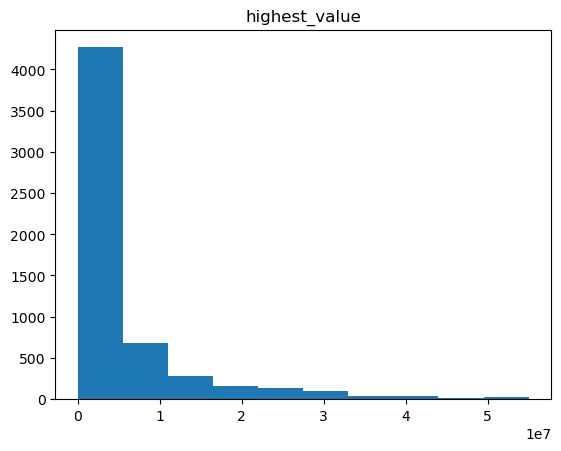

In [517]:
for i in numeric_features:
    plt.hist(df[i])
    plt.title(i)
    plt.show()

In [518]:
df.shape

(5743, 19)

In [519]:
df.shape

(5743, 19)

In [520]:
df.shape

(5743, 19)

#### 2. Feature engineering

1. Feature scaling
2. Aggregation
3. One hot coding

In [521]:
df.describe()

,Unnamed: 0,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value
count,5743.00000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5743.000000,5.743000e+03,5.743000e+03
mean,4965.93923,181.333385,26.027004,46.965871,0.117552,0.086878,0.167007,0.001815,0.003947,0.129832,0.027645,3224.821348,99.064426,12.974404,1.419119,3.390384e+06,5.220665e+06
std,3070.62769,6.846489,4.379801,20.593143,0.131816,0.087997,0.097620,0.005936,0.010414,0.408816,0.090270,1643.954976,124.675160,16.139539,1.834695,6.124239e+06,8.314052e+06
min,1.00000,164.000000,16.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,2305.00000,176.000000,23.000000,29.000000,0.000000,0.000000,0.092752,0.000000,0.000000,0.000000,0.000000,1780.500000,0.000000,0.000000,0.000000,4.000000e+05,6.000000e+05
50%,4886.00000,181.240353,26.000000,49.000000,0.070130,0.064332,0.160428,0.000000,0.000000,0.000000,0.000000,3120.000000,44.000000,6.000000,1.000000,1.000000e+06,2.000000e+06
75%,7138.00000,186.000000,29.000000,63.000000,0.182556,0.138284,0.234742,0.000000,0.000000,0.000000,0.000000,4466.500000,162.000000,21.000000,2.000000,3.200000e+06,6.000000e+06
max,10753.00000,200.000000,37.000000,97.000000,0.547945,0.398230,0.399408,0.029940,0.054828,3.400000,0.796460,6999.000000,598.000000,64.000000,8.000000,5.500000e+07,5.500000e+07


In [522]:
categorical_features


['team']

In [523]:
df.drop("Unnamed: 0", inplace=True, axis=1)
# df.drop("clean sheets", inplace=True, axis=1)

# one hot coding
df = pd.get_dummies(df, columns=categorical_features)

In [524]:
print(df['position'].value_counts())


position
Defender Centre-Back          1006
midfield-CentralMidfield       666
Attack Centre-Forward          644
Goalkeeper                     558
Defender Right-Back            521
midfield-DefensiveMidfield     479
Defender Left-Back             473
Attack-RightWinger             430
midfield-AttackingMidfield     419
Attack-LeftWinger              389
midfield-RightMidfield          57
midfield-LeftMidfield           49
Attack-SecondStriker            37
midfield                         6
Defender                         5
Attack                           4
Name: count, dtype: int64


In [525]:
encoder = LabelEncoder()
df["position_encoded"] = encoder.fit_transform(df['position'])
df.drop('position', axis=1, inplace=True)


In [526]:
df.shape

for i in df.columns:
    print(i)

height
age
appearance
goals
assists
yellow cards
second yellow cards
red cards
goals conceded
clean sheets
minutes played
days_injured
games_injured
award
current_value
highest_value
team_1.FC Köln
team_1.FC Union Berlin
team_1.FSV Mainz 05
team_AA Argentinos Juniors
team_AC Ajaccio
team_AC Milan
team_AC Monza
team_ACF Fiorentina
team_AFC Bournemouth
team_AJ Auxerre
team_AS Monaco
team_AS Roma
team_AZ Alkmaar
team_Abha Club
team_Adana Demirspor
team_Adelaide United
team_Ajax Amsterdam
team_Akhmat Grozny
team_Al-Adalah FC
team_Al-Batin FC
team_Al-Fateh SC
team_Al-Fayha FC
team_Al-Hilal Saudi FC
team_Al-Ittihad Club (Jeddah)
team_Al-Khaleej
team_Al-Nassr FC
team_Al-Raed SFC
team_Al-Shabab Club (Riyadh)
team_Al-Taawoun FC
team_Al-Tai
team_Al-Wehda FC
team_Alanyaspor
team_Albirex Niigata
team_AmaZulu FC
team_América Futebol Clube (MG)
team_Angers SCO
team_Antalyaspor
team_Arsenal FC
team_Arsenal Fútbol Club
team_Aston Villa
team_Atalanta BC
team_Athletic Bilbao
team_Atlanta United FC
team_

In [527]:
df.head(2)


,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,...,team_Western Sydney Wanderers,team_Western United FC,team_Wigan Athletic,team_Wolfsberger AC,team_Wolverhampton Wanderers,team_Yokohama F. Marinos,team_Yokohama FC,team_Zenit St. Petersburg,team_Ümraniyespor,position_encoded
0,196.0,30.0,15,0.0,0.0,0.069018,0.0,0.0,1.242331,0.207055,...,False,False,False,False,False,False,False,False,False,9
1,186.0,21.0,34,0.0,0.0,0.130529,0.0,0.0,0.000000,0.000000,...,False,False,False,False,False,False,False,False,False,6


#### 3. Feature selection

In [528]:
# sns.heatmap(df.corr(), annot=True);

In [529]:
correlation = df.corr()
print(correlation["position_encoded"].sort_values(ascending=False))

position_encoded    1.000000
goals conceded      0.137164
clean sheets        0.132269
yellow cards        0.089864
minutes played      0.073158
                      ...   
team_Gangwon FC    -0.030292
team_FC Seoul      -0.031199
height             -0.063787
assists            -0.164697
goals              -0.439485
Name: position_encoded, Length: 388, dtype: float64


In [530]:
# Set the correlation threshold
threshold = 0.01 # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['position_encoded']) > threshold]['position_encoded'].index
selected_features

Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'goals conceded', 'clean sheets',
       'minutes played',
       ...
       'team_Ural Yekaterinburg', 'team_Urawa Red Diamonds',
       'team_Vancouver Whitecaps FC', 'team_VfL Bochum', 'team_WSG Tirol',
       'team_Watford FC', 'team_West Ham United', 'team_Wolfsberger AC',
       'team_Zenit St. Petersburg', 'position_encoded'],
      dtype='object', length=155)

In [531]:
# selected_features = ['appearance', 'minutes played', 'current_value', 'highest_value']

In [532]:
df = df[selected_features]
df.head()
df.columns
df["position_encoded"].value_counts()

position_encoded
6     1006
12     666
1      644
9      558
8      521
13     479
7      473
3      430
11     419
2      389
15      57
14      49
4       37
10       6
5        5
0        4
Name: count, dtype: int64

#### 4. Prepare train and test data

In [533]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)


In [534]:
# Prepare data
X = df.drop(['position_encoded'], axis=1)
y = df['position_encoded']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.15,
                                                    shuffle=True,
                                                    random_state=42)

# sacle the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_scaled, y_train)


In [535]:
X.shape

(5743, 154)

## Buliding the Model

In [536]:
model = LogisticRegression()


## Train the Model

In [537]:
# Fit the model on the training data
model.fit(X_train_resampled, y_train_resampled )

LogisticRegression()

## Test the Model

# Predict and evaluate the model
y_pred = model.predict(X_test_scaled)


In [538]:
y_pred = model.predict(X_test_scaled)


## Interpretation of the Model

In [539]:
print(model.intercept_) 

[-7.19761236  1.70892281  1.7489881   2.02848901  0.51975857 -7.99954529
  0.79015876  2.72364038  2.81005436 -2.30843418 -6.46512962  2.38103268
  3.40282706  2.8790243   1.38956507  1.58826034]


## Evaluating the Model 

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.57      0.48      0.52        98
           2       0.15      0.18      0.16        50
           3       0.14      0.10      0.11        72
           4       0.04      0.67      0.08         3
           5       0.00      0.00      0.00         1
           6       0.73      0.68      0.71       144
           7       0.17      0.20      0.18        54
           8       0.25      0.16      0.20        79
           9       1.00      1.00      1.00        90
          10       0.00      0.00      0.00         2
          11       0.17      0.11      0.13        64
          12       0.41      0.23      0.29       111
          13       0.24      0.29      0.26        77
          14       0.02      0.09      0.04        11
          15       0.00      0.00      0.00         6

    accuracy                           0.39       862
   

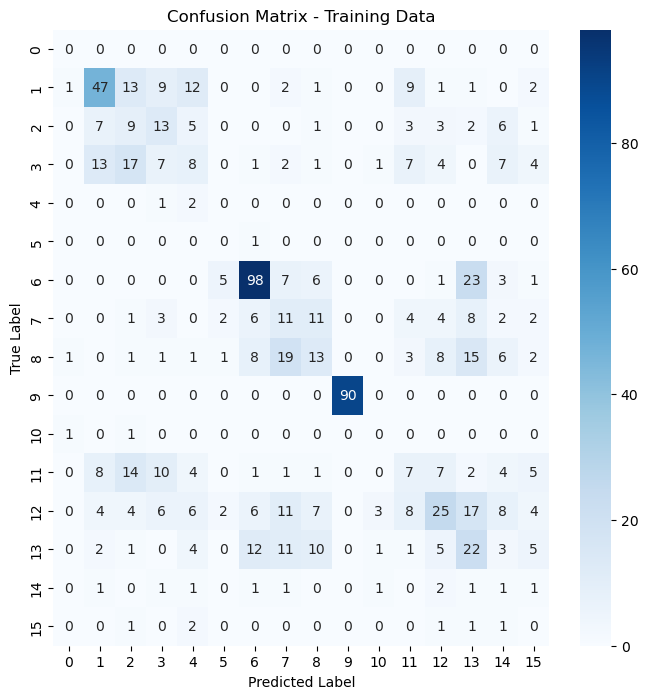

In [540]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report

# Print the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
conf_matrix_test = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

#### Predictions vs. Real Values

In [541]:
predictions = model.predict(X_test_scaled)
#predictions

In [542]:
Real_Values = np.array(y_test)
#Real_Values

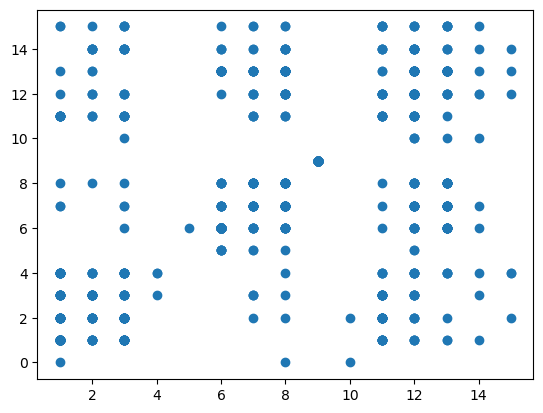

In [543]:
plt.scatter(Real_Values,predictions); 

#### Residual Histogram

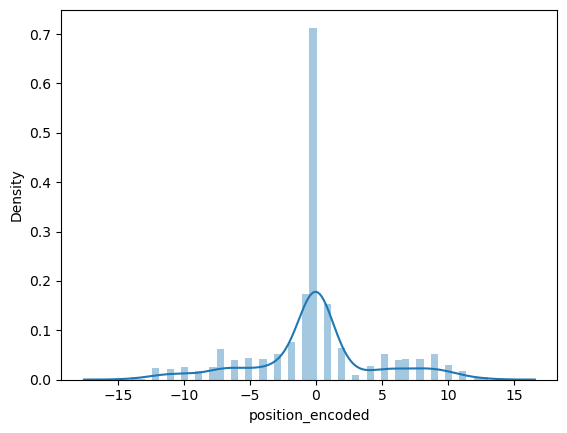

In [544]:
sns.distplot((y_test-predictions),bins=50); # it's good if we get normal distribution